# fbprophet

In [1]:
#Steps to install fbprophet
#conda install anaconda
#conda update anaconda
#conda update conda
#conda install libpython m2w64-toolchain -c msys2   # To install packages of c and c++
#pip install pystan
#pip install fbprophet

In [1]:
#Library Files
import pandas as pd
from fbprophet import Prophet
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
# Load Data set
data = pd.read_csv('spot-prices-for-crude-oil-and-petroleum-products.csv',sep=';', header=0,index_col=0, parse_dates=True)
data

,Brent Spot Price (U.S. Dollars per Barrel),WTI Spot Price (U.S. Dollars per Barrel)
Date,,
2001-12-31,19.35,19.96
2001-12-27,18.87,21.07
2001-12-19,19.03,19.37
2001-12-11,17.61,18.04
2001-12-07,17.81,19.08
...,...,...
1986-05-14,NaN,15.53
1986-05-05,NaN,14.32
1986-04-30,NaN,13.38


In [3]:
#Rename Column names
data.rename(columns={'Brent Spot Price (U.S. Dollars per Barrel)':'Brent_Price','WTI Spot Price (U.S. Dollars per Barrel)':'WIT_Price'}, inplace=True)
data.columns

Index(['Brent_Price', 'WIT_Price'], dtype='object')

In [4]:
#Chk Missing values in Data set
print("Missing Values Before Imputation :",pd.isnull(data).sum())
# Fill Missing values using interpolate-liner method
data.interpolate(method='linear', inplace=True)
#Chk Missing values in Data set
print("Missing Values After Interpolate-Linear Method :",pd.isnull(data).sum())

Missing Values Before Imputation : Brent_Price    416
WIT_Price      132
dtype: int64
Missing Values After Interpolate-Linear Method : Brent_Price    0
WIT_Price      0
dtype: int64


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9193 entries, 2001-12-31 to 1986-04-08
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brent_Price  9193 non-null   float64
 1   WIT_Price    9193 non-null   float64
dtypes: float64(2)
memory usage: 215.5 KB


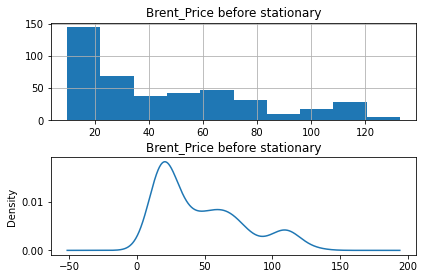

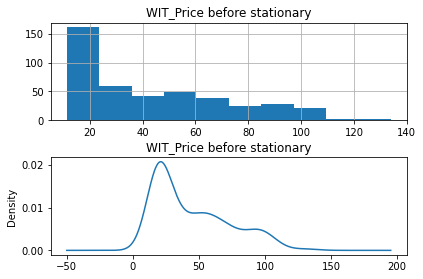

In [5]:
#Resample the data in monthly and liner interpolate
upsampled=data.resample('M').mean().interpolate(method='linear')
for col in upsampled:
    plt.subplot(211)
    plt.title(f"{col} before stationary")
    upsampled[col].hist()
    plt.tight_layout(pad=2.00)   #To give the space between subplots            
    plt.subplot(212)
    upsampled[col].plot(kind='kde')
    plt.title(f"{col} before stationary")
    plt.show()
df=upsampled
#data=data1

In [6]:
Brent=pd.DataFrame()
WIT=pd.DataFrame()
Brent['Brent_Price']=df['Brent_Price']
WIT['WIT_Price']=df['WIT_Price']

In [7]:
Brent.to_csv('Brent.csv')
WIT.to_csv('WIT.csv')


In [8]:
# Load Data set
Brent = pd.read_csv('Brent.csv', header=0)
WIT = pd.read_csv('WIT.csv', header=0)


In [9]:
Brent.rename(columns = {'Date':'ds','Brent_Price':'y'}, inplace = True)
WIT.rename(columns={'Date':'ds','WIT_Price':'y'}, inplace=True)
Brent.info()
Brent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      431 non-null    object 
 1   y       431 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      431 non-null    object 
 1   y       431 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.9+ KB


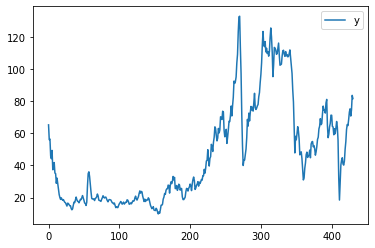

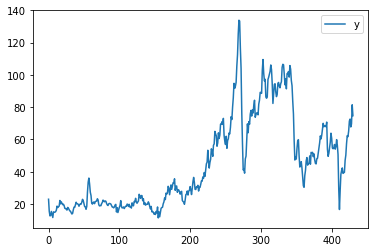

In [10]:
# load and plot the car sales dataset

# plot the time series
Brent.plot()
plt.show()
WIT.plot()
plt.show()

In [11]:
# prepare expected column names
#Brent 
#Brent.columns = ['ds', 'y']
Brent['ds']= pd.to_datetime(Brent['ds'])
#WIT 
#WIT.columns = ['ds', 'y']
WIT['ds']= pd.to_datetime(WIT['ds'])
Brent.info()
WIT.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      431 non-null    datetime64[ns]
 1   y       431 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      431 non-null    datetime64[ns]
 1   y       431 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.9 KB


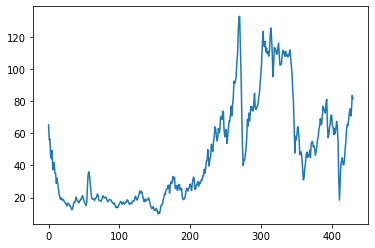

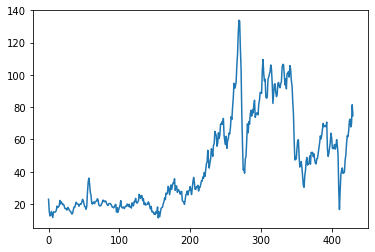

In [16]:
# plot the time series
plt.plot(Brent['y'])
plt.show()
plt.plot(WIT['y'])
plt.show()

In [12]:
#Prepare Model for Brent
Brent_model = Prophet()
# fit the model
Brent_model.fit(Brent)
#Prepare Model for WIT
WIT_model = Prophet()
# fit the model
WIT_model.fit(WIT)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\pc\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\pc\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


# Make an In-Sample Forecasy

In [16]:
Brent.tail(15)

,ds,y
416,2020-09-30,40.909545
417,2020-10-31,40.189545
418,2020-11-30,42.692381
419,2020-12-31,49.993636
420,2021-01-31,54.774000
421,2021-02-28,62.276500
422,2021-03-31,65.410000
423,2021-04-30,64.760952
424,2021-05-31,68.503571
425,2021-06-30,73.164091


In [13]:
# define the period for which we want a prediction
#Brent
Brent_future = list()
Brent_future.append(['2020-12'])
#Brent_future=('2020-12')
for i in range(1, 12):
    date = '2021-%02d' % i
    Brent_future.append([date])
Brent_future = pd.DataFrame(Brent_future)
Brent_future.columns = ['ds']
Brent_future['ds']= pd.to_datetime(Brent_future['ds'])+ pd.offsets.MonthEnd(1)

#WIT
WIT_future = list()
WIT_future.append(['2020-12-1'])
for i in range(1, 12):
    date = '2021-%02d' % i
    WIT_future.append([date])
WIT_future = pd.DataFrame(WIT_future)
WIT_future.columns = ['ds']
WIT_future['ds']= pd.to_datetime(WIT_future['ds'])+pd.offsets.MonthEnd(1)

In [14]:
Brent_future['ds']

0    2020-12-31
1    2021-01-31
2    2021-02-28
3    2021-03-31
4    2021-04-30
5    2021-05-31
6    2021-06-30
7    2021-07-31
8    2021-08-31
9    2021-09-30
10   2021-10-31
11   2021-11-30
Name: ds, dtype: datetime64[ns]

In [15]:
WIT_future['ds']

0    2020-12-31
1    2021-01-31
2    2021-02-28
3    2021-03-31
4    2021-04-30
5    2021-05-31
6    2021-06-30
7    2021-07-31
8    2021-08-31
9    2021-09-30
10   2021-10-31
11   2021-11-30
Name: ds, dtype: datetime64[ns]

In [16]:
#use the model to make a forecast
#Brent
Brent_forecast = Brent_model.predict(Brent_future)
#WIT
WIT_forecast = WIT_model.predict(WIT_future)

C:\Users\pc\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\pc\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\pc\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\pc\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [31]:
# summarize the forecast
#Brent
print("\nBrent Forecast \n")
print(Brent_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(13))
#WIT
print("\nWIT Forecast \n")
print(WIT_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(13))


Brent Forecast 

           ds       yhat  yhat_lower  yhat_upper
0  2020-12-31  50.321784   32.212039   69.123196
1  2021-01-31  54.032458   34.743992   72.104768
2  2021-02-28  52.970939   34.047525   72.489197
3  2021-03-31  52.763583   33.605486   71.586580
4  2021-04-30  52.136502   32.774389   70.746470
5  2021-05-31  52.956456   33.247402   73.233455
6  2021-06-30  53.047428   33.234191   70.909901
7  2021-07-31  53.043512   34.004733   72.124338
8  2021-08-31  52.953681   32.694395   72.791912
9  2021-09-30  52.266037   31.315609   72.762191
10 2021-10-31  51.048909   30.988817   69.212775
11 2021-11-30  48.870323   29.351088   67.894054

WIT Forecast 

           ds       yhat  yhat_lower  yhat_upper
0  2020-12-31  46.058704   30.085246   63.404099
1  2021-01-31  47.394063   31.513921   64.022300
2  2021-02-28  47.744785   31.461180   64.103448
3  2021-03-31  47.919998   32.896597   64.256207
4  2021-04-30  47.788568   31.811039   64.670742
5  2021-05-31  48.386242   32.63892

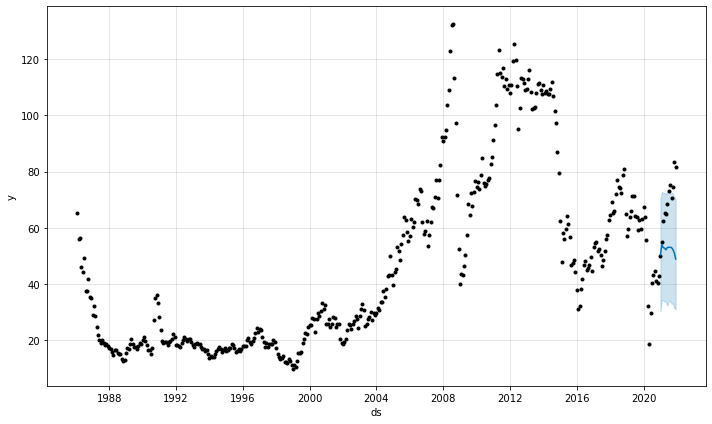

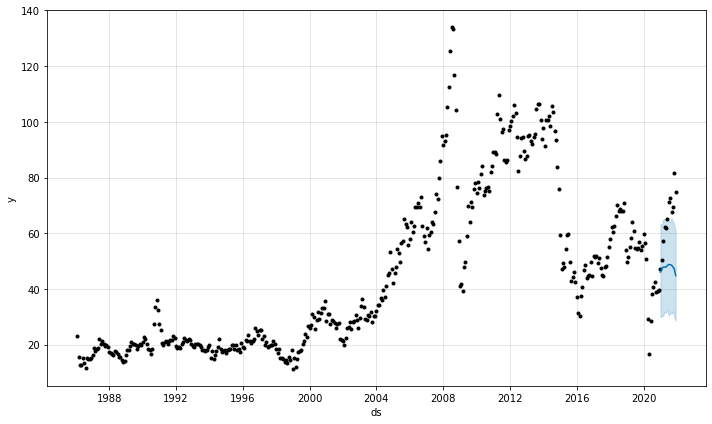

In [17]:
# plot forecast
Brent_model.plot(Brent_forecast)
plt.show()
WIT_model.plot(WIT_forecast)
plt.show()

# Make an Out-of-Sample Forecast

In [18]:
# define the period for which we want a prediction
#Brent
Brent_future = list()
Brent_future.append(['2021-12'])
#Brent_future=('2020-12')
for i in range(1, 12):
    date = '2022-%02d' % i
    Brent_future.append([date])
Brent_future = pd.DataFrame(Brent_future)
Brent_future.columns = ['ds']
Brent_future['ds']= pd.to_datetime(Brent_future['ds'])+ pd.offsets.MonthEnd(1)

#WIT
WIT_future = list()
WIT_future.append(['2021-12-1'])
for i in range(1, 12):
    date = '2022-%02d' % i
    WIT_future.append([date])
WIT_future = pd.DataFrame(WIT_future)
WIT_future.columns = ['ds']
WIT_future['ds']= pd.to_datetime(WIT_future['ds'])+ pd.offsets.MonthEnd(1)


C:\Users\pc\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\pc\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\pc\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\pc\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


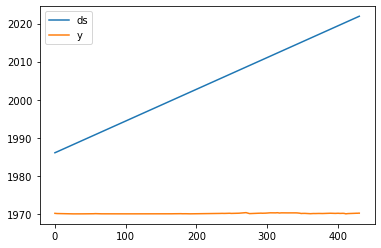

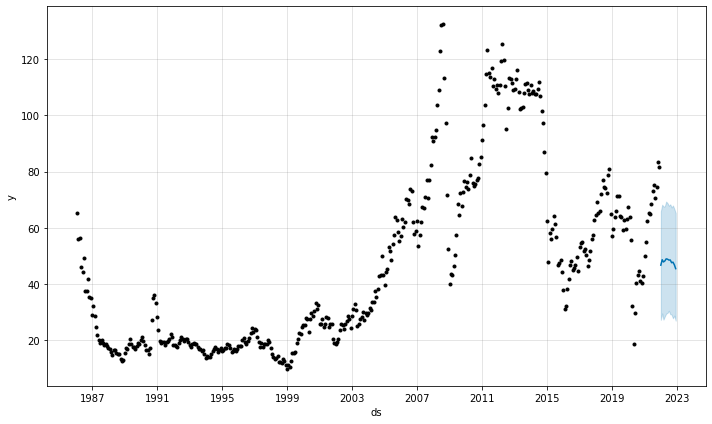

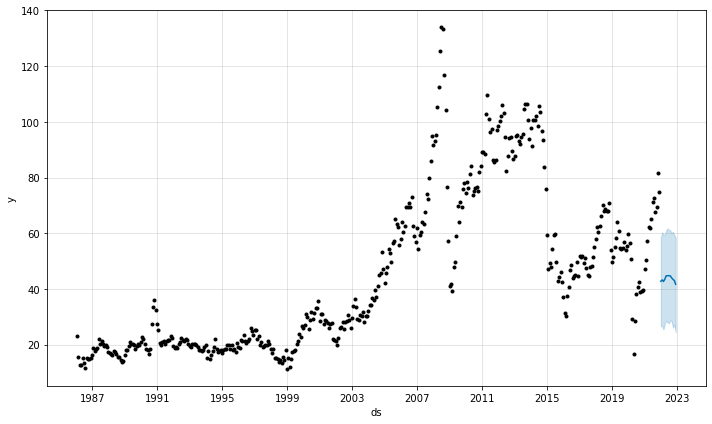

In [45]:
#use the model to make a forecast
#Brent
Brent_forecast = Brent_model.predict(Brent_future)
#WIT
WIT_forecast = WIT_model.predict(WIT_future)

# plot forecast
Brent.plot()
plt.show()
Brent_model.plot(Brent_forecast)
plt.show()
WIT_model.plot(WIT_forecast)
plt.show()


# Manually Evaluate Forecast Model

In [19]:
df

,Brent_Price,WIT_Price
Date,,
1986-01-31,65.205177,22.925455
1986-02-28,56.006723,15.454737
1986-03-31,56.382299,12.612500
1986-04-30,45.882289,12.843636
1986-05-31,44.164229,15.377619
...,...,...
2021-07-31,75.165909,72.616364
2021-08-31,70.675000,67.730455
2021-09-30,74.488636,69.560836


In [20]:
# create train dataset, remove last 12 months
#Brent
Brent_train = Brent.drop(Brent.index[-12:])
Brent_test=Brent[-12:]
#WIT
WIT_train = WIT.drop(WIT.index[-12:])
WIT_test=WIT[-12:]


In [21]:
# calculate MAE between expected and predicted values for december
#Brent
Brent_y_true = Brent['y'][-12:].values
# use the model to make a forecast
Brent_forecast = Brent_model.predict(Brent_test)
Brent_y_pred = Brent_forecast['yhat'].values
mae = mean_absolute_error(Brent_y_true, Brent_y_pred)
print('MAE: %.3f' % mae)

#WIT
WIT_y_true = WIT['y'][-12:].values
# use the model to make a forecast
WIT_forecast = WIT_model.predict(WIT_test)
WIT_y_pred = WIT_forecast['yhat'].values
mae = mean_absolute_error(WIT_y_true, WIT_y_pred)
print('\n MAE: %.3f' % mae)





C:\Users\pc\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\pc\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


MAE: 16.544


C:\Users\pc\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\pc\anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



 MAE: 17.515


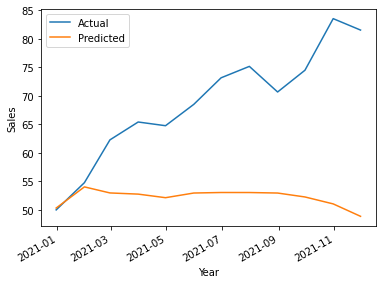

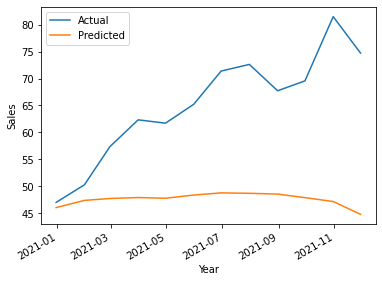

In [37]:
# plot expected vs actual
#Brent
plt.plot(Brent_test.ds,Brent_y_true, label='Actual')
plt.plot(Brent_test.ds,Brent_y_pred, label='Predicted')
plt.xlabel('Year')
plt.ylabel("Sales")
plt.xticks(rotation=30, ha='right')
plt.legend()
plt.show()

#WIT
plt.plot(WIT_test.ds,WIT_y_true, label='Actual')
plt.plot(WIT_test.ds,WIT_y_pred, label='Predicted')
plt.xlabel('Year')
plt.ylabel("Sales")
plt.xticks(rotation=30, ha='right')
plt.legend()
plt.show()
